In [ ]:
import glob
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Estrazione file dalle cartelle

In [ ]:
tsv_files = glob.glob('/content/drive/MyDrive/lung/prova_tsv/*.tsv')


# Create a list to store DataFrames
dfs = []
alfa = 0.001

# Loop through each .tsv file
for file in tsv_files:
    # Read the current .tsv file into a DataFrame
    df = pd.read_csv(file, sep='\t', skiprows=[0,2,3,4,5])
    df.set_index('gene_id', inplace=True)
    df = df[['fpkm_uq_unstranded']]
    df[['fpkm_uq_unstranded']] = np.log2(df[['fpkm_uq_unstranded']] + alfa)
    df = df.T
    df['tumor'] = 0
    # Append the selected columns DataFrame to the list
    dfs.append(df)

# Concatenate the DataFrames along columns (axis=0)
result_df = pd.concat(dfs, axis=0)

In [ ]:
result_df

gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
fpkm_uq_unstranded,1.970412,-3.599462,4.584794,1.454334,-0.345198,4.756666,5.083562,3.600103,0.964510,2.617722,...,2.004537,-2.681307,-9.965784,4.604866,-6.493297,1.605210,-9.965784,-5.265345,-3.054093,0
fpkm_uq_unstranded,2.613909,-4.218934,5.669622,0.813853,-0.992804,4.953819,3.489607,4.299963,1.083588,3.429670,...,-9.965784,-2.899695,-9.965784,-1.645209,-9.965784,1.210514,-9.965784,-7.643856,-2.425075,0
fpkm_uq_unstranded,3.501414,-3.582080,4.629817,0.869319,-1.203568,4.252287,4.306532,4.587773,1.432211,2.610983,...,-9.965784,-5.878321,-9.965784,-9.965784,-9.965784,1.318056,-9.965784,-5.435963,-3.188365,0
fpkm_uq_unstranded,2.214125,-2.492484,4.471779,1.953452,0.415434,4.387431,5.212386,3.590782,1.633896,3.286112,...,2.342896,-3.213571,-9.965784,5.066033,-9.965784,1.656634,-9.965784,-4.583809,-4.243318,0


In [ ]:
shuffled_df = result_df.sample(frac=1).reset_index(drop=True)
shuffled_df

gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,2.214125,-2.492484,4.471779,1.953452,0.415434,4.387431,5.212386,3.590782,1.633896,3.286112,...,2.342896,-3.213571,-9.965784,5.066033,-9.965784,1.656634,-9.965784,-4.583809,-4.243318,0
1,2.613909,-4.218934,5.669622,0.813853,-0.992804,4.953819,3.489607,4.299963,1.083588,3.429670,...,-9.965784,-2.899695,-9.965784,-1.645209,-9.965784,1.210514,-9.965784,-7.643856,-2.425075,0
2,1.970412,-3.599462,4.584794,1.454334,-0.345198,4.756666,5.083562,3.600103,0.964510,2.617722,...,2.004537,-2.681307,-9.965784,4.604866,-6.493297,1.605210,-9.965784,-5.265345,-3.054093,0
3,3.501414,-3.582080,4.629817,0.869319,-1.203568,4.252287,4.306532,4.587773,1.432211,2.610983,...,-9.965784,-5.878321,-9.965784,-9.965784,-9.965784,1.318056,-9.965784,-5.435963,-3.188365,0


In [ ]:
import os
import shutil

def move_tsv_files(main_directory, destination_directory):
    # Iterate through all subdirectories in the main directory
    for root, dirs, files in os.walk(main_directory):
        for directory in dirs:
            folder_path = os.path.join(root, directory)

            # Find .tsv files in the current subdirectory
            tsv_files = [f for f in os.listdir(folder_path) if f.endswith('.tsv')]

            # Move .tsv files to the destination directory
            for tsv_file in tsv_files:
                tsv_file_path = os.path.join(folder_path, tsv_file)
                destination_path = os.path.join(destination_directory, tsv_file)
                shutil.move(tsv_file_path, destination_path)

# Specify the path to your main directory
main_directory_path = '/content/drive/MyDrive/lung/prova'

# Specify the path to the destination directory
destination_directory_path = '/content/drive/MyDrive/lung/prova_tsv'

# Create the destination directory if it doesn't exist
os.makedirs(destination_directory_path, exist_ok=True)

# Call the function to move .tsv files
move_tsv_files(main_directory_path, destination_directory_path)

#Creazione Dataframe

In [ ]:
import pandas as pd
import numpy as np
# Specifica il percorso del file TSV
alfa = 0.001
tsv_file_path = '/content/drive/MyDrive/lung/prova_tsv/1eb9bd2a-9d0d-4dd6-8e91-8eca788861d1.rna_seq.augmented_star_gene_counts.tsv'
# Crea un DataFrame dal file TSV
df = pd.read_csv(tsv_file_path, sep='\t', skiprows=[0,2,3,4,5])
df.set_index('gene_id', inplace=True)
df = df[['fpkm_uq_unstranded']]
df[['fpkm_uq_unstranded']] = np.log2(df[['fpkm_uq_unstranded']] + alfa)
df

,fpkm_uq_unstranded
gene_id,
ENSG00000000003.15,2.613909
ENSG00000000005.6,-4.218934
ENSG00000000419.13,5.669622
ENSG00000000457.14,0.813853
ENSG00000000460.17,-0.992804
...,...
ENSG00000288669.1,-9.965784
ENSG00000288670.1,1.210514
ENSG00000288671.1,-9.965784


In [ ]:
df = df.T
df

gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
fpkm_uq_unstranded,2.613909,-4.218934,5.669622,0.813853,-0.992804,4.953819,3.489607,4.299963,1.083588,3.42967,...,-9.965784,-9.965784,-2.899695,-9.965784,-1.645209,-9.965784,1.210514,-9.965784,-7.643856,-2.425075


In [ ]:
df['tumor'] = 0

In [ ]:
df

gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
fpkm_uq_unstranded,6.1206,0.0527,50.9,1.7569,0.5015,30.9909,11.2315,19.6968,2.1183,10.7744,...,0.0,0.133,0.0,0.3187,0.0,2.3132,0.0,0.004,0.1852,0


In [ ]:
import glob

tsv_files = glob.glob('/content/drive/MyDrive/lung/prova_tsv/*.tsv')


# Create a list to store DataFrames
dfs = []
alfa = 0.001

# Loop through each .tsv file
for file in tsv_files:
    # Read the current .tsv file into a DataFrame
    df = pd.read_csv(file, sep='\t', skiprows=[0,2,3,4,5])
    df.set_index('gene_id', inplace=True)
    df = df[['fpkm_uq_unstranded']]
    df[['fpkm_uq_unstranded']] = np.log2(df[['fpkm_uq_unstranded']] + alfa)
    df = df.T
    df['tumor'] = 0
    # Append the selected columns DataFrame to the list
    dfs.append(df)

# Concatenate the DataFrames along columns (axis=1)
result_df = pd.concat(dfs, axis=0)

In [ ]:
# Display the resulting DataFrame
result_df

gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
fpkm_uq_unstranded,1.970412,-3.599462,4.584794,1.454334,-0.345198,4.756666,5.083562,3.600103,0.964510,2.617722,...,2.004537,-2.681307,-9.965784,4.604866,-6.493297,1.605210,-9.965784,-5.265345,-3.054093,0
fpkm_uq_unstranded,2.613909,-4.218934,5.669622,0.813853,-0.992804,4.953819,3.489607,4.299963,1.083588,3.429670,...,-9.965784,-2.899695,-9.965784,-1.645209,-9.965784,1.210514,-9.965784,-7.643856,-2.425075,0
fpkm_uq_unstranded,3.501414,-3.582080,4.629817,0.869319,-1.203568,4.252287,4.306532,4.587773,1.432211,2.610983,...,-9.965784,-5.878321,-9.965784,-9.965784,-9.965784,1.318056,-9.965784,-5.435963,-3.188365,0
fpkm_uq_unstranded,2.214125,-2.492484,4.471779,1.953452,0.415434,4.387431,5.212386,3.590782,1.633896,3.286112,...,2.342896,-3.213571,-9.965784,5.066033,-9.965784,1.656634,-9.965784,-4.583809,-4.243318,0


#Codice

#Estrazione file lung_normal

In [ ]:
import os
import shutil

def move_tsv_files(main_directory, destination_directory):
    # Iterate through all subdirectories in the main directory
    for root, dirs, files in os.walk(main_directory):
        for directory in dirs:
            folder_path = os.path.join(root, directory)

            # Find .tsv files in the current subdirectory
            tsv_files = [f for f in os.listdir(folder_path) if f.endswith('.tsv')]

            # Move .tsv files to the destination directory
            for tsv_file in tsv_files:
                tsv_file_path = os.path.join(folder_path, tsv_file)
                destination_path = os.path.join(destination_directory, tsv_file)
                shutil.move(tsv_file_path, destination_path)

# Specify the path to your main directory
main_directory_path = '/content/drive/MyDrive/lung/lung_normal'

# Specify the path to the destination directory
destination_directory_path = '/content/drive/MyDrive/lung/lung_normal_tsv'

# Create the destination directory if it doesn't exist
os.makedirs(destination_directory_path, exist_ok=True)

# Call the function to move .tsv files
move_tsv_files(main_directory_path, destination_directory_path)

KeyboardInterrupt: 

#Estrazione file lung_tumor


In [ ]:
import os
import shutil

def move_tsv_files(main_directory, destination_directory_1, destination_directory_2):
    # Counter for tracking the number of processed files
    file_counter = 0

    # Iterate through all subdirectories in the main directory
    for root, dirs, files in os.walk(main_directory):
        for directory in dirs:
            folder_path = os.path.join(root, directory)

            # Find .tsv files in the current subdirectory
            tsv_files = [f for f in os.listdir(folder_path) if f.endswith('.tsv')]

            # Move .tsv files to the destination directories
            for tsv_file in tsv_files:
                tsv_file_path = os.path.join(folder_path, tsv_file)

                # Decide which destination directory to use based on file_counter
                if file_counter % 2 == 0:
                    destination_path = os.path.join(destination_directory_1, tsv_file)
                else:
                    destination_path = os.path.join(destination_directory_2, tsv_file)
                # Copy the file
                shutil.copy(tsv_file_path, destination_path)

                # Increment the file counter
                file_counter += 1

# Specify the path to your main directory
main_directory_path = '/content/drive/MyDrive/lung/lung_tumor'

# Specify the paths to the destination directories
destination_directory_path_1 = '/content/drive/MyDrive/lung/lung_tumor_tsv_1'
destination_directory_path_2 = '/content/drive/MyDrive/lung/lung_tumor_tsv_2'

# Call the function to move .tsv files
move_tsv_files(main_directory_path, destination_directory_path_1, destination_directory_path_2)

#Dataframe normal

In [ ]:
tsv_files = glob.glob('/content/drive/MyDrive/lung/lung_normal_tsv/*.tsv')


# Create a list to store DataFrames
dfs = []
alfa = 0.001

# Loop through each .tsv file
for file in tsv_files:
    # Read the current .tsv file into a DataFrame
    df = pd.read_csv(file, sep='\t', skiprows=[0,2,3,4,5])
    df = df[df['gene_type'] == 'protein_coding']
    df.set_index('gene_id', inplace=True)
    df = df[['fpkm_uq_unstranded']]
    df[['fpkm_uq_unstranded']] = np.log2(df[['fpkm_uq_unstranded']] + alfa)
    df = df.T
    df['tumor'] = 0
    # Append the selected columns DataFrame to the list
    dfs.append(df)

# Concatenate the DataFrames along columns (axis=0)
result_df = pd.concat(dfs, axis=0)

<ipython-input-2-cbc8fc7f198f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['fpkm_uq_unstranded']] = np.log2(df[['fpkm_uq_unstranded']] + alfa)
<ipython-input-2-cbc8fc7f198f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['fpkm_uq_unstranded']] = np.log2(df[['fpkm_uq_unstranded']] + alfa)
<ipython-input-2-cbc8fc7f198f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [ ]:
result_df

gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
fpkm_uq_unstranded,4.339558,-5.127841,4.542147,1.132050,-1.118414,4.291780,3.587077,3.684662,2.316754,2.736194,...,-9.965784,-7.795859,-3.432844,-3.723563,-9.965784,-9.965784,-9.965784,-6.049308,-3.927963,0
fpkm_uq_unstranded,2.659377,-1.934566,4.511342,1.998593,0.231924,4.348551,4.722335,3.390255,2.124857,3.329023,...,-9.965784,-5.493297,-4.143054,-9.965784,-9.965784,-9.965784,-9.965784,-4.608232,-2.923578,0
fpkm_uq_unstranded,2.379344,-5.227016,4.282173,1.180339,-0.991370,4.410660,4.010923,3.905928,1.100843,2.780226,...,-9.965784,-9.965784,-3.685942,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-3.453241,0
fpkm_uq_unstranded,2.413377,-2.344465,4.582514,1.694212,0.110898,4.298284,4.774023,3.393567,1.303810,3.102524,...,-9.965784,-7.020926,-3.631288,-4.748554,-9.965784,-9.965784,-9.965784,-5.844769,-4.383831,0
fpkm_uq_unstranded,2.357214,-3.578629,4.474137,1.192005,-0.742024,4.991272,5.105070,3.827270,1.954382,2.856946,...,-9.965784,-9.965784,-3.585540,-9.965784,-9.965784,-5.293359,-9.965784,-6.493297,-3.283492,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fpkm_uq_unstranded,2.741855,-3.582080,4.487744,2.227464,0.619929,4.408603,3.924242,3.727376,2.603312,3.131096,...,-9.965784,-5.351074,-3.269512,-2.568324,-9.965784,-6.861448,-9.965784,-4.030325,-3.187050,0
fpkm_uq_unstranded,2.905447,-2.944527,4.775999,2.173863,0.614286,3.906843,5.260786,3.542456,1.790105,3.017726,...,-9.965784,-6.532825,-4.662004,-9.965784,-9.965784,-9.965784,-9.965784,-3.791857,-3.129103,0
fpkm_uq_unstranded,2.286112,-3.334971,4.482906,1.199625,-0.432844,4.743537,5.973593,4.443898,1.535804,2.917031,...,-9.965784,-6.601212,-0.509225,-9.965784,-9.965784,-9.965784,-9.965784,-5.293359,-3.519528,0
fpkm_uq_unstranded,2.502203,-1.708396,4.277464,1.931986,0.525868,4.049622,4.844978,3.213938,1.471708,3.064745,...,-9.965784,-9.965784,-6.200250,-9.965784,-9.965784,-9.965784,-9.965784,-4.643856,-2.888969,0


In [ ]:
result_df.to_csv('/content/drive/MyDrive/lung/lung_normal_coding.csv', index=False)

#Dataframe tumor 1

In [ ]:
tsv_files = glob.glob('/content/drive/MyDrive/lung/lung_tumor_tsv_1/*.tsv')


# Create a list to store DataFrames
dfs_t1 = []
alfa = 0.001

# Loop through each .tsv file
for file in tsv_files:
    # Read the current .tsv file into a DataFrame
    df = pd.read_csv(file, sep='\t', skiprows=[0,2,3,4,5])
    df = df[df['gene_type'] == 'protein_coding']
    df.set_index('gene_id', inplace=True)
    df = df[['fpkm_uq_unstranded']]
    df[['fpkm_uq_unstranded']] = np.log2(df[['fpkm_uq_unstranded']] + alfa)
    df = df.T
    df['tumor'] = 1
    # Append the selected columns DataFrame to the list
    dfs_t1.append(df)

# Concatenate the DataFrames along columns (axis=0)
result_df_t1 = pd.concat(dfs_t1, axis=0)

<ipython-input-5-631629d51545>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['fpkm_uq_unstranded']] = np.log2(df[['fpkm_uq_unstranded']] + alfa)
<ipython-input-5-631629d51545>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['fpkm_uq_unstranded']] = np.log2(df[['fpkm_uq_unstranded']] + alfa)
<ipython-input-5-631629d51545>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [ ]:
result_df_t1

gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
fpkm_uq_unstranded,3.486740,-9.965784,5.172844,1.602267,2.895497,2.559272,2.707149,3.671350,2.969547,2.785697,...,-9.965784,-6.717857,-1.311148,-9.965784,-9.965784,-9.965784,-9.965784,-8.532825,-2.334971,1
fpkm_uq_unstranded,3.563549,-9.965784,5.505129,0.720629,1.305737,3.598722,3.788393,3.856219,3.300753,3.142332,...,-9.965784,-9.965784,-1.479553,-9.965784,-9.965784,-9.965784,-9.965784,-5.869860,-2.107182,1
fpkm_uq_unstranded,3.414636,-9.965784,4.876036,0.443076,0.660746,-0.314912,0.776188,3.013444,5.734376,3.168385,...,-9.965784,-7.333516,-1.372206,-9.965784,-9.965784,-9.965784,-9.965784,-8.333516,-0.057392,1
fpkm_uq_unstranded,4.024515,-3.910502,4.125254,1.106549,-0.166341,2.647752,4.162838,4.337154,1.217479,3.487358,...,-9.965784,-9.965784,-1.236843,-3.480357,-9.965784,-9.965784,-9.965784,-7.861448,-2.114035,1
fpkm_uq_unstranded,4.169003,-1.840629,4.531756,2.968423,2.185549,2.645448,4.612323,3.733170,2.015783,3.846644,...,-9.965784,-6.049308,-3.286304,-9.965784,-9.965784,-9.965784,-9.965784,-4.832385,-2.347399,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fpkm_uq_unstranded,3.145254,-9.965784,6.301474,1.506500,2.677914,2.449403,3.445303,5.412324,2.358621,3.361853,...,-9.965784,-7.039785,-1.560217,-9.965784,-9.965784,-9.965784,-9.965784,-6.795859,-3.687800,1
fpkm_uq_unstranded,2.903231,-9.965784,4.858289,1.243425,0.823586,2.041523,3.680358,4.943753,6.735640,3.864315,...,-9.965784,-6.844769,-4.594225,-9.965784,-9.965784,-9.965784,-9.965784,-5.665661,-1.280335,1
fpkm_uq_unstranded,3.352674,-9.965784,4.714559,0.845751,0.248535,3.338895,4.015060,4.427633,0.664574,3.323817,...,-9.965784,-9.965784,0.236952,-9.965784,-9.965784,-9.965784,-9.965784,-5.921390,-2.751465,1
fpkm_uq_unstranded,3.166426,-4.559792,5.055204,1.541862,1.183455,1.795808,1.982583,4.856777,4.251734,3.408236,...,-9.965784,-9.965784,-1.970300,-5.107803,-9.965784,-9.965784,-9.965784,-6.429731,-1.361416,1


In [ ]:
result_df_t1.to_csv('/content/drive/MyDrive/lung/lung_tumor_1_coding.csv', index=False)

#Dataframe tumor 2

In [ ]:
tsv_files = glob.glob('/content/drive/MyDrive/lung/lung_tumor_tsv_2/*.tsv')


# Create a list to store DataFrames
dfs_t2 = []
alfa = 0.001

# Loop through each .tsv file
for file in tsv_files:
    # Read the current .tsv file into a DataFrame
    df = pd.read_csv(file, sep='\t', skiprows=[0,2,3,4,5])
    df = df[df['gene_type'] == 'protein_coding']
    df.set_index('gene_id', inplace=True)
    df = df[['fpkm_uq_unstranded']]
    df[['fpkm_uq_unstranded']] = np.log2(df[['fpkm_uq_unstranded']] + alfa)
    df = df.T
    df['tumor'] = 1
    # Append the selected columns DataFrame to the list
    dfs_t2.append(df)

# Concatenate the DataFrames along columns (axis=0)
result_df_t2 = pd.concat(dfs_t2, axis=0)

<ipython-input-2-3be67324c774>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['fpkm_uq_unstranded']] = np.log2(df[['fpkm_uq_unstranded']] + alfa)
<ipython-input-2-3be67324c774>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['fpkm_uq_unstranded']] = np.log2(df[['fpkm_uq_unstranded']] + alfa)
<ipython-input-2-3be67324c774>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [ ]:
result_df_t2

gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
fpkm_uq_unstranded,2.353126,-0.283141,4.345361,2.874482,1.831391,2.604024,3.878627,3.251977,4.392372,4.089091,...,-9.965784,-5.615287,-4.265345,-9.965784,-9.965784,-9.965784,-9.965784,-4.155855,-1.881507,1
fpkm_uq_unstranded,4.111282,-1.049905,4.319343,2.489414,1.172167,2.391245,4.892877,3.775588,1.486611,4.137667,...,-9.965784,-4.779918,-2.834442,-2.973696,-9.965784,-9.965784,-9.965784,-4.290533,-1.604718,1
fpkm_uq_unstranded,2.943715,-2.706512,4.457456,2.455728,1.304044,2.468557,4.002162,3.890923,1.172872,3.354339,...,-9.965784,-6.764150,-4.496549,-9.965784,-9.965784,-9.965784,-9.965784,-6.127841,-3.373327,1
fpkm_uq_unstranded,3.184820,-3.236503,4.534354,1.584289,1.332221,2.747967,4.243677,2.878058,6.511321,3.134550,...,-9.965784,-3.851001,-4.039785,-9.965784,-9.965784,-7.243318,-9.965784,-5.526161,-1.654717,1
fpkm_uq_unstranded,4.399151,-4.787866,4.936007,1.713256,1.590051,2.649202,2.293076,3.720880,7.084592,3.133580,...,-9.965784,-9.965784,-1.309359,-9.965784,-9.965784,-9.965784,-9.965784,-5.861448,-1.427013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fpkm_uq_unstranded,2.827352,-5.828281,5.458950,1.390503,0.803310,4.568956,2.757237,4.013864,1.944746,2.920122,...,-9.965784,-7.097888,-2.216250,-9.965784,-9.965784,-7.137965,-9.965784,-5.733124,-2.771027,1
fpkm_uq_unstranded,4.919159,-9.965784,4.806401,2.202700,1.007985,3.487654,3.856030,4.175245,5.274038,3.057883,...,-9.965784,-9.965784,-1.325178,-9.965784,-9.965784,-9.965784,-9.965784,-6.058894,-2.636661,1
fpkm_uq_unstranded,3.948292,-6.546245,3.840856,2.528996,0.847356,1.855153,3.846664,4.708220,3.621478,3.499068,...,-9.965784,-9.965784,-6.559792,-3.654717,-9.965784,-9.965784,-9.965784,-5.853084,-3.282088,1
fpkm_uq_unstranded,2.632873,-6.615287,4.549663,0.432425,0.505078,0.986957,3.707955,3.901485,-1.422366,2.786805,...,-9.965784,-9.965784,-2.513749,-9.965784,-9.965784,-7.002310,-9.965784,-8.702750,-2.085589,1


In [ ]:
result_df_t2.to_csv('/content/drive/MyDrive/lung/lung_tumor_2_coding.csv', index=False)

#Protein interaction

In [ ]:
df_protein_link = pd.read_csv('/content/drive/MyDrive/PPI/9606.protein.links.v12.0.txt', sep=' ')
df_protein_link

,protein1,protein2,combined_score
0,9606.ENSP00000000233,9606.ENSP00000356607,173
1,9606.ENSP00000000233,9606.ENSP00000427567,154
2,9606.ENSP00000000233,9606.ENSP00000253413,151
3,9606.ENSP00000000233,9606.ENSP00000493357,471
4,9606.ENSP00000000233,9606.ENSP00000324127,201
...,...,...,...
13715399,9606.ENSP00000501317,9606.ENSP00000475489,195
13715400,9606.ENSP00000501317,9606.ENSP00000370447,158
13715401,9606.ENSP00000501317,9606.ENSP00000312272,226
13715402,9606.ENSP00000501317,9606.ENSP00000402092,169


In [ ]:
df_protein_info = pd.read_csv('/content/drive/MyDrive/PPI/9606.protein.info.v12.0.txt', sep = '\t')
df_protein_info

,#string_protein_id,preferred_name,protein_size,annotation
0,9606.ENSP00000000233,ARF5,180,ADP-ribosylation factor 5; GTP-binding protein...
1,9606.ENSP00000000412,M6PR,277,Cation-dependent mannose-6-phosphate receptor;...
2,9606.ENSP00000001008,FKBP4,459,"Peptidyl-prolyl cis-trans isomerase FKBP4, N-t..."
3,9606.ENSP00000001146,CYP26B1,512,Cytochrome P450 26B1; Involved in the metaboli...
4,9606.ENSP00000002125,NDUFAF7,441,"Protein arginine methyltransferase NDUFAF7, mi..."
...,...,...,...,...
19694,9606.ENSP00000501254,ALDH3B2,385,Aldehyde dehydrogenase family 3 member B2; Oxi...
19695,9606.ENSP00000501259,FAM163B,166,Protein FAM163B; Family with sequence similari...
19696,9606.ENSP00000501265,NWD1,1432,NACHT domain- and WD repeat-containing protein...
19697,9606.ENSP00000501277,LDB1,411,LIM domain-binding protein 1; Binds to the LIM...


In [ ]:
file = pd.read_csv('/content/drive/MyDrive/lung/lung_tumor/00000c20-b875-4821-8d4b-c50d7a7f9879/09743be0-4b54-4e31-aa66-c9202a49bd59.rna_seq.augmented_star_gene_counts.tsv',sep='\t', skiprows=[0,2,3,4,5])
file

,gene_id,gene_name,gene_type,unstranded,stranded_first,stranded_second,tpm_unstranded,fpkm_unstranded,fpkm_uq_unstranded
0,ENSG00000000003.15,TSPAN6,protein_coding,2642,1,2641,49.9587,12.2089,12.7152
1,ENSG00000000005.6,TNMD,protein_coding,1,1,0,0.0581,0.0142,0.0148
2,ENSG00000000419.13,DPM1,protein_coding,331,3,328,23.5219,5.7483,5.9866
3,ENSG00000000457.14,SCYL3,protein_coding,564,162,705,7.0283,1.7176,1.7888
4,ENSG00000000460.17,C1orf112,protein_coding,437,182,572,6.2785,1.5344,1.5980
...,...,...,...,...,...,...,...,...,...
60655,ENSG00000288669.1,AC008763.4,protein_coding,0,0,0,0.0000,0.0000,0.0000
60656,ENSG00000288670.1,AL592295.6,lncRNA,187,0,194,8.8764,2.1692,2.2592
60657,ENSG00000288671.1,AC006486.3,protein_coding,0,0,0,0.0000,0.0000,0.0000
60658,ENSG00000288674.1,AL391628.1,protein_coding,1,0,1,0.0089,0.0022,0.0023


In [ ]:
file = file[file['gene_type'] == 'protein_coding']
file = file.drop(['gene_type', 'unstranded', 'stranded_first', 'stranded_second', 'tpm_unstranded', 'fpkm_unstranded', 'fpkm_uq_unstranded'], axis=1)
file

,gene_id,gene_name
0,ENSG00000000003.15,TSPAN6
1,ENSG00000000005.6,TNMD
2,ENSG00000000419.13,DPM1
3,ENSG00000000457.14,SCYL3
4,ENSG00000000460.17,C1orf112
...,...,...
60650,ENSG00000288661.1,AL451106.1
60655,ENSG00000288669.1,AC008763.4
60657,ENSG00000288671.1,AC006486.3
60658,ENSG00000288674.1,AL391628.1


In [ ]:
df_protein_info = df_protein_info.drop(['protein_size', 'annotation'], axis=1)
df_protein_info

,#string_protein_id,preferred_name
0,9606.ENSP00000000233,ARF5
1,9606.ENSP00000000412,M6PR
2,9606.ENSP00000001008,FKBP4
3,9606.ENSP00000001146,CYP26B1
4,9606.ENSP00000002125,NDUFAF7
...,...,...
19694,9606.ENSP00000501254,ALDH3B2
19695,9606.ENSP00000501259,FAM163B
19696,9606.ENSP00000501265,NWD1
19697,9606.ENSP00000501277,LDB1


In [ ]:
df_protein_info = df_protein_info.rename(columns={"#string_protein_id": "protein1", "preferred_name": "gene_name"})
df_protein_info

,protein1,gene_name
0,9606.ENSP00000000233,ARF5
1,9606.ENSP00000000412,M6PR
2,9606.ENSP00000001008,FKBP4
3,9606.ENSP00000001146,CYP26B1
4,9606.ENSP00000002125,NDUFAF7
...,...,...
19694,9606.ENSP00000501254,ALDH3B2
19695,9606.ENSP00000501259,FAM163B
19696,9606.ENSP00000501265,NWD1
19697,9606.ENSP00000501277,LDB1


In [ ]:
res = df_protein_info.set_index('gene_name').join(file.set_index('gene_name'))
res

,protein1,gene_id
gene_name,,
A1BG,9606.ENSP00000263100,ENSG00000121410.12
A1CF,9606.ENSP00000378868,ENSG00000148584.15
A2M,9606.ENSP00000323929,ENSG00000175899.15
A2ML1,9606.ENSP00000299698,ENSG00000166535.20
A3GALT2,9606.ENSP00000475261,ENSG00000184389.9
...,...,...
hCG_1642624,9606.ENSP00000492384,NaN
hCG_1796489,9606.ENSP00000489727,NaN
hCG_1984214,9606.ENSP00000390331,NaN


In [ ]:
res = res.dropna(axis=0)

In [ ]:
res

,protein1,gene_id
gene_name,,
A1BG,9606.ENSP00000263100,ENSG00000121410.12
A1CF,9606.ENSP00000378868,ENSG00000148584.15
A2M,9606.ENSP00000323929,ENSG00000175899.15
A2ML1,9606.ENSP00000299698,ENSG00000166535.20
A3GALT2,9606.ENSP00000475261,ENSG00000184389.9
...,...,...
ZYG11A,9606.ENSP00000360583,ENSG00000203995.10
ZYG11B,9606.ENSP00000294353,ENSG00000162378.13
ZYX,9606.ENSP00000324422,ENSG00000159840.16


In [ ]:
copia = res
copia = copia.rename(columns={'protein1': 'protein2', 'gene_id': 'gene_id'})
copia

,protein2,gene_id
gene_name,,
A1BG,9606.ENSP00000263100,ENSG00000121410.12
A1CF,9606.ENSP00000378868,ENSG00000148584.15
A2M,9606.ENSP00000323929,ENSG00000175899.15
A2ML1,9606.ENSP00000299698,ENSG00000166535.20
A3GALT2,9606.ENSP00000475261,ENSG00000184389.9
...,...,...
ZYG11A,9606.ENSP00000360583,ENSG00000203995.10
ZYG11B,9606.ENSP00000294353,ENSG00000162378.13
ZYX,9606.ENSP00000324422,ENSG00000159840.16


In [ ]:
df_final = res.set_index('protein1').join(df_protein_link.set_index('protein1'), how='inner')
df_final

,gene_id,protein2,combined_score
protein1,,,
9606.ENSP00000000233,ENSG00000004059.11,9606.ENSP00000356607,173
9606.ENSP00000000233,ENSG00000004059.11,9606.ENSP00000427567,154
9606.ENSP00000000233,ENSG00000004059.11,9606.ENSP00000253413,151
9606.ENSP00000000233,ENSG00000004059.11,9606.ENSP00000493357,471
9606.ENSP00000000233,ENSG00000004059.11,9606.ENSP00000324127,201
...,...,...,...
9606.ENSP00000501317,ENSG00000181827.15,9606.ENSP00000475489,195
9606.ENSP00000501317,ENSG00000181827.15,9606.ENSP00000370447,158
9606.ENSP00000501317,ENSG00000181827.15,9606.ENSP00000312272,226


In [ ]:
df_final = df_final.rename(columns={'gene_id': 'gene_id1', 'protein2': 'protein2', 'combined_score': 'score'})
df_final

,gene_id1,protein2,score
protein1,,,
9606.ENSP00000000233,ENSG00000004059.11,9606.ENSP00000356607,173
9606.ENSP00000000233,ENSG00000004059.11,9606.ENSP00000427567,154
9606.ENSP00000000233,ENSG00000004059.11,9606.ENSP00000253413,151
9606.ENSP00000000233,ENSG00000004059.11,9606.ENSP00000493357,471
9606.ENSP00000000233,ENSG00000004059.11,9606.ENSP00000324127,201
...,...,...,...
9606.ENSP00000501317,ENSG00000181827.15,9606.ENSP00000475489,195
9606.ENSP00000501317,ENSG00000181827.15,9606.ENSP00000370447,158
9606.ENSP00000501317,ENSG00000181827.15,9606.ENSP00000312272,226


In [ ]:
link = copia.set_index('protein2').join(df_final.set_index('protein2'), how='inner')
link

,gene_id,gene_id1,score
protein2,,,
9606.ENSP00000000233,ENSG00000004059.11,ENSG00000003056.8,228
9606.ENSP00000000233,ENSG00000004059.11,ENSG00000001630.17,169
9606.ENSP00000000233,ENSG00000004059.11,ENSG00000007255.10,154
9606.ENSP00000000233,ENSG00000004059.11,ENSG00000005486.17,166
9606.ENSP00000000233,ENSG00000004059.11,ENSG00000006025.12,233
...,...,...,...
9606.ENSP00000501317,ENSG00000181827.15,ENSG00000198824.7,212
9606.ENSP00000501317,ENSG00000181827.15,ENSG00000132424.16,187
9606.ENSP00000501317,ENSG00000181827.15,ENSG00000187240.16,187


In [ ]:
link_file = link.reset_index(drop=True)
link_file

,gene_id,gene_id1,score
0,ENSG00000004059.11,ENSG00000003056.8,228
1,ENSG00000004059.11,ENSG00000001630.17,169
2,ENSG00000004059.11,ENSG00000007255.10,154
3,ENSG00000004059.11,ENSG00000005486.17,166
4,ENSG00000004059.11,ENSG00000006025.12,233
...,...,...,...
13479485,ENSG00000181827.15,ENSG00000198824.7,212
13479486,ENSG00000181827.15,ENSG00000132424.16,187
13479487,ENSG00000181827.15,ENSG00000187240.16,187
13479488,ENSG00000181827.15,ENSG00000105880.7,234


In [ ]:
link_file.to_csv('/content/drive/MyDrive/lung/link.csv')

In [ ]:
file = file.reset_index(drop=True)
file

,gene_id,gene_name
0,ENSG00000000003.15,TSPAN6
1,ENSG00000000005.6,TNMD
2,ENSG00000000419.13,DPM1
3,ENSG00000000457.14,SCYL3
4,ENSG00000000460.17,C1orf112
...,...,...
19957,ENSG00000288661.1,AL451106.1
19958,ENSG00000288669.1,AC008763.4
19959,ENSG00000288671.1,AC006486.3
19960,ENSG00000288674.1,AL391628.1


In [ ]:
file['index'] = [i for i in range(file.shape[0])]
file

,gene_id,gene_name,index
0,ENSG00000000003.15,TSPAN6,0
1,ENSG00000000005.6,TNMD,1
2,ENSG00000000419.13,DPM1,2
3,ENSG00000000457.14,SCYL3,3
4,ENSG00000000460.17,C1orf112,4
...,...,...,...
19957,ENSG00000288661.1,AL451106.1,19957
19958,ENSG00000288669.1,AC008763.4,19958
19959,ENSG00000288671.1,AC006486.3,19959
19960,ENSG00000288674.1,AL391628.1,19960


In [ ]:
merge = file.set_index('gene_id').join(link_file.set_index('gene_id'), how='inner')
merge

,gene_name,index,gene_id1,score
gene_id,,,,
ENSG00000000003.15,TSPAN6,0,ENSG00000004776.13,186
ENSG00000000003.15,TSPAN6,0,ENSG00000010610.10,182
ENSG00000000003.15,TSPAN6,0,ENSG00000011105.14,343
ENSG00000000003.15,TSPAN6,0,ENSG00000019549.13,366
ENSG00000000003.15,TSPAN6,0,ENSG00000034971.17,235
...,...,...,...,...
ENSG00000288649.1,ACTL10,19952,ENSG00000273213.3,204
ENSG00000288649.1,ACTL10,19952,ENSG00000118194.20,174
ENSG00000288649.1,ACTL10,19952,ENSG00000198668.13,211


In [ ]:
merge = merge.reset_index(drop=True)
merge

,gene_name,index,gene_id1,score
0,TSPAN6,0,ENSG00000004776.13,186
1,TSPAN6,0,ENSG00000010610.10,182
2,TSPAN6,0,ENSG00000011105.14,343
3,TSPAN6,0,ENSG00000019549.13,366
4,TSPAN6,0,ENSG00000034971.17,235
...,...,...,...,...
13479485,ACTL10,19952,ENSG00000273213.3,204
13479486,ACTL10,19952,ENSG00000118194.20,174
13479487,ACTL10,19952,ENSG00000198668.13,211
13479488,ACTL10,19952,ENSG00000078747.16,375


In [ ]:
merge = merge.drop('gene_name', axis=1).rename(columns={'index': 'index1', 'gene_id1': 'gene_id', 'score': 'score'})
merge

,index1,gene_id,score
0,0,ENSG00000004776.13,186
1,0,ENSG00000010610.10,182
2,0,ENSG00000011105.14,343
3,0,ENSG00000019549.13,366
4,0,ENSG00000034971.17,235
...,...,...,...
13479485,19952,ENSG00000273213.3,204
13479486,19952,ENSG00000118194.20,174
13479487,19952,ENSG00000198668.13,211
13479488,19952,ENSG00000078747.16,375


In [ ]:
merge_final = merge.set_index('gene_id').join(file.set_index('gene_id'), how='inner')
merge_final

,index1,score,gene_name,index
gene_id,,,,
ENSG00000000003.15,1,241,TSPAN6,0
ENSG00000000003.15,57,186,TSPAN6,0
ENSG00000000003.15,75,163,TSPAN6,0
ENSG00000000003.15,109,196,TSPAN6,0
ENSG00000000003.15,118,248,TSPAN6,0
...,...,...,...,...
ENSG00000288649.1,19538,188,ACTL10,19952
ENSG00000288649.1,19540,222,ACTL10,19952
ENSG00000288649.1,19565,152,ACTL10,19952


In [ ]:
merge_final = merge_final.drop('gene_name', axis=1).reset_index(drop=True)
merge_final

,index1,score,index
0,1,241,0
1,57,186,0
2,75,163,0
3,109,196,0
4,118,248,0
...,...,...,...
13479485,19538,188,19952
13479486,19540,222,19952
13479487,19565,152,19952
13479488,19904,204,19952


In [ ]:
merge_final.to_csv('/content/drive/MyDrive/lung/link_index.csv')

#Methylation Connections

In [ ]:
connections = pd.read_excel('/content/drive/MyDrive/lung/Methylation Data/illumina_humanmethylation27_content.xlsx')
connections

,Name,GenomeBuild,Chr,MapInfo,Source,SourceVersion,SourceSeq,TSS_Coordinate,Gene_Strand,Gene_ID,...,Synonym,Accession,GID,Annotation,Product,Distance_to_TSS,CPG_ISLAND,CPG_ISLAND_LOCATIONS,MIR_CPG_ISLAND,MIR_NAMES
0,cg00000292,36,16,28797601,NCBI:RefSeq,36.1,CGGCCTCAATGGTAAGTGTCCCTTGGAAGAGCGGCTGGTAATTAAT...,28797310.0,+,GeneID:487,...,ATP2A; SERCA1;,NM_173201.2,GI:47132613,isoform a is encoded by transcript variant a; ...,ATPase; Ca++ transporting; fast twitch 1 isofo...,291.0,True,16:28797486-28797825,NaN,NaN
1,cg00002426,36,3,57718583,NCBI:RefSeq,36.1,CGCTCTCGTCTGGTTTGATCACAAGACGGGCAAGGTAATGTCACCA...,57718214.0,+,GeneID:7871,...,SLAP; KIAA1601;,NM_007159.2,GI:56550042,Sarcolemmal-associated protein; go_component: ...,sarcolemma associated protein,369.0,True,3:57716811-57718675,NaN,NaN
2,cg00003994,36,7,15692387,NCBI:RefSeq,36.1,GGTGGTGGTGGTGCCCCCTGTGATGCTGGCTGGCAAACATGCCCTC...,15692819.0,-,GeneID:4223,...,GAX; MOX2;,NM_005924.3,GI:55956906,growth arrest-specific homeo box; go_component...,mesenchyme homeo box 2,432.0,True,7:15691512-15693551,NaN,NaN
3,cg00005847,36,2,176737319,NCBI:RefSeq,36.1,TACTGTAATGCACCCTGTATTTAAGGCACTGGGCTTGCCCCATTAA...,176737051.0,+,GeneID:3232,...,HOX4; HOX1D; HOX4A; Hox-4.1; MGC10470;,NM_006898.4,GI:23510372,homeobox protein Hox-D3; Hox-4.1; mouse; homol...,homeobox D3,268.0,False,NaN,NaN,NaN
4,cg00006414,36,7,148453770,NCBI:RefSeq,36.1,CTCGGAAACCGAGCAGGGCAAAACCCCAGTGCTGATCGTTAGTGGG...,148454441.0,+,GeneID:57541,...,P51; P71; ZER6; KIAA1339;,NM_020781.2,GI:25777702,isoform b is encoded by transcript variant 2; ...,zinc finger 398 isoform b,671.0,True,7:148453584-148455804,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27573,cg27657283,36,1,43006110,NCBI:RefSeq,36.1,GGACCAAAGGTTCCTCTAACTGCAACTTGAGTGCCCATAATCTTCC...,43005270.0,-,GeneID:64175,...,P3H1; GROS1; MGC117314;,NM_022356.2,GI:21361917,prolyl 3-hydroxylase 1; growth suppressor 1; g...,leucine proline-enriched proteoglycan (lepreca...,840.0,True,1:43004664-43006120,NaN,NaN
27574,cg27661264,36,20,56861133,NCBI:RefSeq,36.1,TGACTGATTTGGAGTCTTTCTCCTCGCTTCTCCGCTGGCCAGAGAA...,NaN,+,GeneID:2778,...,XL; AHO; GSA; GSP; POH; XL2; GPSA; NESP; GNAS1...,NT_011362.9,guanine nucleotide binding protein; alpha stim...,isoform a is encoded by transcript variant 1; ...,NaN,NaN,True,20:56860981-56861502,NaN,NaN
27575,cg27662379,36,3,129852443,NCBI:RefSeq,36.1,CGCCGCCATCTTGTGTCACCAGCCCTTGCCCAATGAACGGCTGCTC...,129852409.0,-,GeneID:6184,...,OST1; RBPH1; DKFZp686B16177;,NM_002950.3,GI:62739176,dolichyl-diphosphooligosaccharide-protein glyc...,ribophorin I precursor,34.0,True,3:129851499-129852999,NaN,NaN
27576,cg27662877,36,18,70110575,NCBI:RefSeq,36.1,GCCTGTGCAGAGTCCAGTCTTGTGAGGGCGGCGAACTAGGCAGCGA...,70110201.0,-,GeneID:1528,...,CYB5; MCB5;,NM_148923.2,GI:56550104,isoform 1 is encoded by transcript variant 1; ...,cytochrome b-5 isoform 1,374.0,True,18:70108996-70110872,NaN,NaN


In [ ]:
connections = connections.drop(['GenomeBuild', 'Chr', 'MapInfo', 'Source', 'SourceVersion', 'SourceSeq', 'TSS_Coordinate', 'Gene_Strand',
                                'Gene_ID', 'Synonym', 'Accession', 'GID', 'Annotation', 'Product', 'Distance_to_TSS', 'CPG_ISLAND',
                                'CPG_ISLAND_LOCATIONS', 'MIR_CPG_ISLAND', 'MIR_NAMES'], axis=1)
connections = connections.rename(columns={'Name': 'Name', 'Symbol': 'gene_name'})
connections

,Name,gene_name
0,cg00000292,ATP2A1
1,cg00002426,SLMAP
2,cg00003994,MEOX2
3,cg00005847,HOXD3
4,cg00006414,ZNF398
...,...,...
27573,cg27657283,LEPRE1
27574,cg27661264,GNAS
27575,cg27662379,RPN1
27576,cg27662877,CYB5A


<Axes: xlabel='Name,gene_name'>

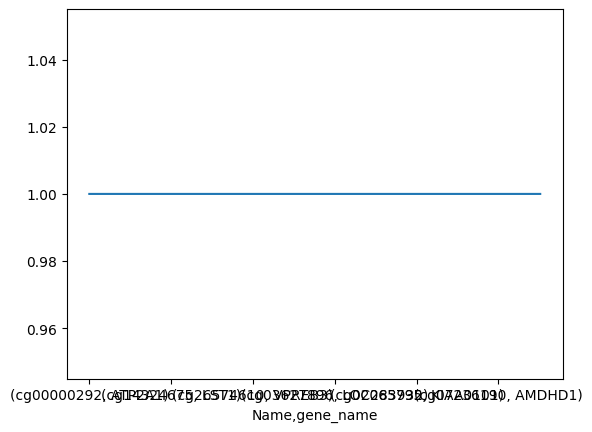

In [ ]:
connections.value_counts().plot()

In [ ]:
file = pd.read_csv('/content/drive/MyDrive/lung/lung_tumor/00000c20-b875-4821-8d4b-c50d7a7f9879/09743be0-4b54-4e31-aa66-c9202a49bd59.rna_seq.augmented_star_gene_counts.tsv',sep='\t', skiprows=[0,2,3,4,5])
file = file[file['gene_type'] == 'protein_coding']
file = file.drop(['gene_type', 'unstranded', 'stranded_first', 'stranded_second', 'tpm_unstranded', 'fpkm_unstranded', 'fpkm_uq_unstranded'], axis=1)
file

,gene_id,gene_name
0,ENSG00000000003.15,TSPAN6
1,ENSG00000000005.6,TNMD
2,ENSG00000000419.13,DPM1
3,ENSG00000000457.14,SCYL3
4,ENSG00000000460.17,C1orf112
...,...,...
60650,ENSG00000288661.1,AL451106.1
60655,ENSG00000288669.1,AC008763.4
60657,ENSG00000288671.1,AC006486.3
60658,ENSG00000288674.1,AL391628.1


In [ ]:
merge = connections.set_index('gene_name').join(file.set_index('gene_name'), how='inner')
merge

,Name,gene_id
gene_name,,
A1BG,cg22568540,ENSG00000121410.12
A2M,cg12058490,ENSG00000175899.15
A2ML1,cg03490200,ENSG00000166535.20
A2ML1,cg27653134,ENSG00000166535.20
A4GALT,cg07393322,ENSG00000128274.17
...,...,...
ZYX,cg03100196,ENSG00000159840.16
ZZEF1,cg05922057,ENSG00000074755.15
ZZEF1,cg07607921,ENSG00000074755.15


In [ ]:
merge = merge.reset_index(drop=False)
merge

,gene_name,Name,gene_id
0,A1BG,cg22568540,ENSG00000121410.12
1,A2M,cg12058490,ENSG00000175899.15
2,A2ML1,cg03490200,ENSG00000166535.20
3,A2ML1,cg27653134,ENSG00000166535.20
4,A4GALT,cg07393322,ENSG00000128274.17
...,...,...,...
21429,ZYX,cg03100196,ENSG00000159840.16
21430,ZZEF1,cg05922057,ENSG00000074755.15
21431,ZZEF1,cg07607921,ENSG00000074755.15
21432,ZZZ3,cg04127303,ENSG00000036549.13


In [ ]:
merge.to_csv('/content/drive/MyDrive/lung/methylation_gene_connections.csv', index=False)

#Methylation Normal

In [ ]:
connections = pd.read_csv('/content/drive/MyDrive/lung/methylation_gene_connections.csv')
connections

,gene_name,Name,gene_id
0,A1BG,cg22568540,ENSG00000121410.12
1,A2M,cg12058490,ENSG00000175899.15
2,A2ML1,cg03490200,ENSG00000166535.20
3,A2ML1,cg27653134,ENSG00000166535.20
4,A4GALT,cg07393322,ENSG00000128274.17
...,...,...,...
21429,ZYX,cg03100196,ENSG00000159840.16
21430,ZZEF1,cg05922057,ENSG00000074755.15
21431,ZZEF1,cg07607921,ENSG00000074755.15
21432,ZZZ3,cg04127303,ENSG00000036549.13


In [ ]:
import os

PATH = '/content/drive/MyDrive/lung/Methylation Data/Normal/'
dir = os.listdir(PATH)
for c, i in enumerate(dir):
  file = [f for f in os.listdir(PATH+i) if f.endswith('.txt')]
  if c == 0:
    df = pd.read_csv(PATH+i+'/'+file[0], sep='\t', header=None, index_col=0).transpose()
  else:
    df = pd.concat([df, pd.read_csv(PATH+i+'/'+file[0], sep='\t', header=None, index_col=0).transpose()], axis=0)
df = df.reset_index(drop=True)
df

,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873,id,a20b5829-4ce7-55f1-8fe6-00f264832e3e
0,0.282650,0.948026,0.937837,0.151616,0.903031,0.771680,0.657229,0.245356,0.205957,0.011373,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.263994,0.953255,0.946127,0.168172,0.891963,0.851623,0.715443,0.280765,0.282187,0.009646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.214318,0.945003,0.932109,0.159281,0.875822,0.848299,0.657024,0.312946,0.232339,0.009240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.268525,0.969614,0.903353,0.151775,0.910185,0.726388,0.610964,0.260128,0.254519,0.017885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.266792,0.972590,0.925261,0.152925,0.918014,0.793015,0.691348,0.291475,0.227954,0.011151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.201103,0.970448,0.855076,0.164894,0.850944,0.747935,0.730409,0.222794,0.232054,0.010325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,0.245478,0.976356,0.896068,0.131495,0.941480,0.737787,0.710704,0.268731,0.208589,0.010873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,0.250370,0.967778,0.965153,0.150704,0.914936,0.780396,0.642412,0.265818,0.237575,0.010575,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,0.419296,0.959149,0.912056,0.163327,0.906912,0.772216,0.663209,0.328934,0.348754,0.017264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_mod = df.dropna(axis=1, how='all')
conn_col = set(connections['Name'].values)
df_col = set(df_mod.columns)
conn_col.intersection(df_col)
df_mod = df_mod.loc[:, conn_col.intersection(df_col)]
df_mod['tumor'] = 0
df_mod

<ipython-input-19-ba742cdfb13c>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_mod = df_mod.loc[:, conn_col.intersection(df_col)]


,cg26093711,cg16658719,cg03277051,cg00810473,cg00292662,cg09473585,cg10227191,cg22334665,cg03712843,cg16082125,...,cg03714916,cg24612772,cg13099330,cg00804392,cg12603043,cg10979891,cg24812103,cg00399483,cg06471905,tumor
0,0.032174,0.050014,0.065836,0.070244,0.062374,0.827096,0.058205,0.083521,0.966143,0.214307,...,0.122531,0.088892,0.433754,0.552246,0.030641,0.236290,0.596476,0.198370,0.281850,0
1,0.027260,0.084540,0.105602,0.065888,0.082998,0.861670,0.059700,0.103108,0.945366,0.039831,...,0.152332,0.068797,0.437009,0.426820,0.034654,0.236640,0.640013,0.280247,0.288945,0
2,0.027077,0.041245,0.061463,0.050208,0.070873,0.808278,0.044720,0.083186,0.963738,0.025959,...,0.126844,0.069755,0.432036,0.522348,0.036260,0.252257,0.685634,0.193104,0.274665,0
3,0.025847,0.044118,0.069812,0.075162,0.136573,0.658091,0.067464,0.116275,0.943049,0.039100,...,0.141710,0.059550,0.414381,0.604903,0.038520,0.186672,0.544965,0.238279,0.282432,0
4,0.027375,0.036215,0.068522,0.065417,0.068651,0.764896,0.076875,0.097870,0.948249,0.171412,...,0.162816,0.058128,0.401126,0.516248,0.031051,0.189420,0.530853,0.242057,0.316365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.035424,0.047199,0.071815,0.052197,0.074587,0.812772,0.062465,0.063398,0.946064,0.038168,...,0.132673,0.105046,0.315301,0.550472,0.037432,0.239396,0.644175,0.226666,0.237965,0
77,0.027703,0.087325,0.068991,0.045052,0.084327,0.838594,0.052792,0.094850,0.960574,0.277848,...,0.153468,0.065627,0.392708,0.536862,0.025979,0.260958,0.630570,0.208611,0.322387,0
78,0.028117,0.051603,0.061626,0.065993,0.076663,0.714575,0.058886,0.086059,0.958599,0.031131,...,0.145772,0.064004,0.409492,0.516173,0.029567,0.159223,0.526638,0.206764,0.272456,0
79,0.034470,0.070670,0.116240,0.062248,0.090086,0.871917,0.115907,0.126765,0.913380,0.125240,...,0.215810,0.061551,0.405747,0.450285,0.033631,0.260030,0.635457,0.295014,0.321467,0


In [ ]:
df_mod.to_csv('/content/drive/MyDrive/lung/methylation_normal.csv', index=False)

#Methylation Tumor

In [ ]:
connections = pd.read_csv('/content/drive/MyDrive/lung/methylation_gene_connections.csv')
connections

,gene_name,Name,gene_id
0,A1BG,cg22568540,ENSG00000121410.12
1,A2M,cg12058490,ENSG00000175899.15
2,A2ML1,cg03490200,ENSG00000166535.20
3,A2ML1,cg27653134,ENSG00000166535.20
4,A4GALT,cg07393322,ENSG00000128274.17
...,...,...,...
21429,ZYX,cg03100196,ENSG00000159840.16
21430,ZZEF1,cg05922057,ENSG00000074755.15
21431,ZZEF1,cg07607921,ENSG00000074755.15
21432,ZZZ3,cg04127303,ENSG00000036549.13


In [ ]:
import os

PATH = '/content/drive/MyDrive/lung/Methylation Data/Tumor/'
dir = os.listdir(PATH)
for c, i in enumerate(dir):
  file = [f for f in os.listdir(PATH+i) if f.endswith('.txt')]
  if c == 0:
    df = pd.read_csv(PATH+i+'/'+file[0], sep='\t', header=None, index_col=0).transpose()
  else:
    df = pd.concat([df, pd.read_csv(PATH+i+'/'+file[0], sep='\t', header=None, index_col=0).transpose()], axis=0)
df = df.reset_index(drop=True)
df

,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,rs9839873,id,4d7d2dd5-0286-5604-8818-73f1d69030cd,138ee9d9-fe15-5530-ac8a-aa9d51b43d57,1aad0292-d4ba-5e63-a7c3-6771dfd8845d,ddf0df77-2272-5a0e-ab6d-3a9ff7e746e0,09289721-e9df-586f-bfa9-65b97a0b8c56,c0642913-2e40-5ded-8eed-ab2dc0db5ae5,dff0af89-25dd-5ae8-a768-e1814f82bdcc,0bae77b2-92d4-5d28-adc6-364dab444bd8
0,0.329823,0.959663,0.917117,0.397558,0.929884,0.675679,0.697091,0.282441,0.294078,0.012920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.402333,0.968233,0.879364,0.201460,0.870442,NaN,0.810933,0.174961,0.277619,0.015132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.266445,0.970081,0.921125,0.180441,0.926132,0.739975,0.681525,0.343191,0.298974,0.013854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.443717,0.970191,0.900206,0.465278,0.872603,0.764000,0.634661,0.496597,0.314936,0.013098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.107518,0.959556,0.926461,0.581748,0.928957,0.849238,0.408542,0.535943,0.151710,0.013090,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,0.513565,0.972482,0.894719,0.508056,0.930042,0.805206,0.732219,0.493670,0.352486,0.015225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
898,0.267717,0.971263,0.936788,0.573027,0.877938,0.704175,0.629726,0.607698,0.247388,0.012006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899,0.076394,0.970831,0.943154,0.793729,0.933462,0.757622,0.867119,0.661945,0.125852,0.009520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900,0.192371,0.960407,0.919246,0.710147,0.898829,NaN,0.742676,0.631819,0.204781,0.012047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_mod = df.dropna(axis=1, how='all')
conn_col = set(connections['Name'].values)
df_col = set(df_mod.columns)
conn_col.intersection(df_col)
df_mod = df_mod.loc[:, conn_col.intersection(df_col)]
df_mod['tumor'] = 1
df_mod

,cg08287471,cg20757912,cg25384157,cg13608094,cg02936263,cg27539233,cg01817393,cg11029501,cg01117627,cg21614638,...,cg11959821,cg06374075,cg02641095,cg08100497,cg06166767,cg12736438,cg06885782,cg01888566,cg15239579,tumor
0,0.047233,0.045065,0.295210,0.876611,0.794938,0.517770,0.331934,0.013314,0.105395,0.387297,...,0.060414,0.087009,0.042375,0.102358,0.251694,0.108039,0.527742,0.021932,0.339590,1
1,0.047929,0.068751,0.300005,0.901037,0.641514,0.454671,0.141736,0.015881,0.115743,0.311605,...,0.019178,0.161492,0.067918,0.137836,0.128326,0.057442,0.512326,0.016823,0.303099,1
2,0.044107,0.059723,0.244709,0.866829,0.803045,0.511150,0.240383,0.013351,0.088343,0.371420,...,0.020601,0.139321,0.055145,0.104594,0.275426,0.087978,0.430298,0.117123,0.306460,1
3,0.037553,0.062845,0.304756,0.933549,0.779978,0.642861,0.188868,0.011518,0.097755,0.228829,...,0.028523,0.089387,0.065926,0.102468,0.476566,0.073052,0.519757,0.101383,0.341678,1
4,0.044370,0.073101,0.140321,0.928437,0.582875,0.202575,0.167616,0.014350,0.115775,0.375092,...,0.025135,0.066339,0.059816,0.093385,0.448843,0.062065,0.295737,0.075301,0.162310,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,0.057057,0.053635,0.283303,0.881003,0.850799,0.589779,0.346722,0.014045,0.054313,0.291864,...,0.030110,0.151271,0.057562,0.099509,0.282749,0.091209,0.537505,0.032691,0.278405,1
898,0.049852,0.052813,0.181286,0.920615,0.872523,0.323914,0.236650,0.011282,0.051398,0.195021,...,0.017601,0.148047,0.042527,0.211188,0.518156,0.050547,0.417541,0.011238,0.208632,1
899,0.029268,0.066384,0.104549,0.768803,0.355640,0.562493,NaN,0.010956,0.083578,0.784418,...,0.024217,0.056519,0.039831,0.072073,0.734543,0.061307,0.394069,0.011801,0.202866,1
900,0.033392,0.064759,0.161991,0.880513,0.264839,0.409925,NaN,0.012245,0.063841,0.653085,...,0.027653,0.064176,0.064332,0.099437,0.617468,0.073385,0.341010,0.131686,0.383518,1


In [ ]:
df_mod.to_csv('/content/drive/MyDrive/lung/methylation_tumor.csv', index=False)

#LOAD BOTH

#NORMAL

In [ ]:
import json

file = open('/content/drive/MyDrive/lung/lung_normal/files.2024-02-01_gene_normal.json')
file_json_gene = json.load(file)
file = open('/content/drive/MyDrive/lung/Methylation Data/lung_meth_normal/files.2024-02-01_normal.json')
file_json_meth = json.load(file)

print(file_json_gene[0]['cases'][0]['case_id'])
print(file_json_meth[0]['cases'][0]['case_id'])

d55de89b-c5bd-4901-9de9-fecaae0f9cfd
46098b0b-a53e-425a-abc0-73561c447ea1


In [ ]:
lista_case_id_gene = {f['cases'][0]['case_id']: i for i, f in enumerate(file_json_gene)}
#lista_case_id_gene

In [ ]:
import os

file_genes = os.listdir('/content/drive/MyDrive/lung/lung_normal_tsv')
file_genes = {f: f for f in file_genes}

In [ ]:
file_methylation = dict()
file_meth = os.listdir('/content/drive/MyDrive/lung/Methylation Data/lung_meth_normal')
for f in file_meth:
  if not f.endswith('.json'):
    l = os.listdir('/content/drive/MyDrive/lung/Methylation Data/lung_meth_normal/'+f)
    for c in l:
      if c.endswith('.txt'):
        file_methylation[c] = f
#file_methylation

In [ ]:
dfs_genes = []
alfa = 0.001

for f in file_json_meth:
  id_meth = f['cases'][0]['case_id']
  filename_meth = f['file_name']
  if id_meth in lista_case_id_gene.keys():
    filename_gene = file_json_gene[lista_case_id_gene[id_meth]]['file_name']

    # Read the current .tsv file into a DataFrame
    df = pd.read_csv('/content/drive/MyDrive/lung/lung_normal_tsv/'+file_genes[filename_gene], sep='\t', skiprows=[0,2,3,4,5])
    df = df[df['gene_type'] == 'protein_coding']
    df.set_index('gene_id', inplace=True)
    df = df[['fpkm_uq_unstranded']]
    df[['fpkm_uq_unstranded']] = np.log2(df[['fpkm_uq_unstranded']] + alfa)
    df = df.rename(columns={'fpkm_uq_unstranded': id_meth})
    df = df.T
    df['tumor'] = 0
    # Append the selected columns DataFrame to the list
    dfs_genes.append(df)

# Concatenate the DataFrames along columns (axis=0)
result_df_gene = pd.concat(dfs_genes, axis=0)

<ipython-input-10-d67cbaeee0f6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['fpkm_uq_unstranded']] = np.log2(df[['fpkm_uq_unstranded']] + alfa)
<ipython-input-10-d67cbaeee0f6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['fpkm_uq_unstranded']] = np.log2(df[['fpkm_uq_unstranded']] + alfa)
<ipython-input-10-d67cbaeee0f6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [ ]:
result_df_gene.to_csv('/content/drive/MyDrive/lung/gene_normal_id.csv')
del result_df_gene
del dfs_genes

In [ ]:
c = 0
for f in file_json_meth:
  id_meth = f['cases'][0]['case_id']
  filename_meth = f['file_name']
  if id_meth in lista_case_id_gene.keys():
    filename_gene = file_json_gene[lista_case_id_gene[id_meth]]['file_name']

    if c == 0:
      result_df_meth = pd.read_csv('/content/drive/MyDrive/lung/Methylation Data/lung_meth_normal/'+file_methylation[filename_meth]+'/'+filename_meth, sep='\t', header=None, index_col=0)
      result_df_meth = result_df_meth.rename(columns={1: id_meth}).transpose()
      c = 1
    else:
      df = pd.read_csv('/content/drive/MyDrive/lung/Methylation Data/lung_meth_normal/'+file_methylation[filename_meth]+'/'+filename_meth, sep='\t', header=None, index_col=0)
      df = df.rename(columns={1: id_meth}).transpose()
      result_df_meth = pd.concat([result_df_meth, df], axis=0)

result_df_meth = result_df_meth.dropna(axis=1, how='all')
conn_col = set(connections['Name'].values)
df_col = set(result_df_meth.columns)
result_df_meth = result_df_meth.loc[:, list(conn_col.intersection(df_col))]
result_df_meth['tumor'] = 0

In [ ]:
result_df_meth.to_csv('/content/drive/MyDrive/lung/meth_normal_id.csv')
del result_df_meth

#TUMOR

In [ ]:
import json

file = open('/content/drive/MyDrive/lung/lung_tumor/files.2024-02-01_gene_tumor.json')
file_json_gene = json.load(file)
file = open('/content/drive/MyDrive/lung/Methylation Data/lung_meth_tumor/files.2024-02-01_tumor.json')
file_json_meth = json.load(file)

print(file_json_gene[0]['cases'][0]['case_id'])
print(file_json_meth[0]['cases'][0]['case_id'])

56c07b06-c6d3-4c03-9e57-7be636e7cc5c
56c07b06-c6d3-4c03-9e57-7be636e7cc5c


In [ ]:
lista_case_id_gene = {f['cases'][0]['case_id']: i for i, f in enumerate(file_json_gene)}
lista_case_id_gene

In [ ]:
import os

file_genes = os.listdir('/content/drive/MyDrive/lung/lung_tumor_tsv_1')
file_genes.extend(os.listdir('/content/drive/MyDrive/lung/lung_tumor_tsv_2'))
file_genes = {f: f for f in file_genes}

In [ ]:
file_methylation = dict()
file_meth = os.listdir('/content/drive/MyDrive/lung/Methylation Data/lung_meth_tumor')
for f in file_meth:
  if not f.endswith('.json') and not f.endswith('.exe') and not f.endswith('.txt'):
    l = os.listdir('/content/drive/MyDrive/lung/Methylation Data/lung_meth_tumor/'+f)
    for c in l:
      if c.endswith('.txt'):
        file_methylation[c] = f
file_methylation

In [ ]:
alfa = 0.001
c = 0

for f in file_json_meth:
  id_meth = f['cases'][0]['case_id']
  filename_meth = f['file_name']
  if id_meth in lista_case_id_gene.keys():
    filename_gene = file_json_gene[lista_case_id_gene[id_meth]]['file_name']

    if c == 0:
      result_df_meth = pd.read_csv('/content/drive/MyDrive/lung/Methylation Data/lung_meth_tumor/'+file_methylation[filename_meth]+'/'+filename_meth, sep='\t', header=None, index_col=0)
      result_df_meth = result_df_meth.rename(columns={1: id_meth}).transpose()
      c = 1
    else:
      df = pd.read_csv('/content/drive/MyDrive/lung/Methylation Data/lung_meth_tumor/'+file_methylation[filename_meth]+'/'+filename_meth, sep='\t', header=None, index_col=0)
      df = df.rename(columns={1: id_meth}).transpose()
      result_df_meth = pd.concat([result_df_meth, df], axis=0)

result_df_meth = result_df_meth.dropna(axis=1, how='all')
conn_col = set(connections['Name'].values)
df_col = set(result_df_meth.columns)
conn_col.intersection(df_col)
result_df_meth = result_df_meth.loc[:, list(conn_col.intersection(df_col))]
result_df_meth['tumor'] = 1

In [ ]:
result_df_meth.to_csv('/content/drive/MyDrive/lung/meth_tumor_id.csv')
del result_df_meth

In [ ]:
alfa = 0.001
c = 0

for f in file_json_meth:
  id_meth = f['cases'][0]['case_id']
  filename_meth = f['file_name']
  if id_meth in lista_case_id_gene.keys():
    filename_gene = file_json_gene[lista_case_id_gene[id_meth]]['file_name']

    path = ''
    # Read the current .tsv file into a DataFrame
    if file_genes[filename_gene] in os.listdir('/content/drive/MyDrive/lung/lung_tumor_tsv_1'):
      path = '/content/drive/MyDrive/lung/lung_tumor_tsv_1/'
    else:
      path = '/content/drive/MyDrive/lung/lung_tumor_tsv_2/'

    if c == 0:
      result_df_gene = pd.read_csv(path+file_genes[filename_gene], sep='\t', skiprows=[0,2,3,4,5])
      result_df_gene = result_df_gene[result_df_gene['gene_type'] == 'protein_coding']
      result_df_gene.set_index('gene_id', inplace=True)
      result_df_gene = result_df_gene[['fpkm_uq_unstranded']]
      result_df_gene[['fpkm_uq_unstranded']] = np.log2(result_df_gene[['fpkm_uq_unstranded']] + alfa)
      result_df_gene = result_df_gene.rename(columns={'fpkm_uq_unstranded': id_meth})
      result_df_gene = result_df_gene.T
      result_df_gene['tumor'] = 1
      c = 1
    else:
      df = pd.read_csv(path+file_genes[filename_gene], sep='\t', skiprows=[0,2,3,4,5])
      df = df[df['gene_type'] == 'protein_coding']
      df.set_index('gene_id', inplace=True)
      df = df[['fpkm_uq_unstranded']]
      df[['fpkm_uq_unstranded']] = np.log2(df[['fpkm_uq_unstranded']] + alfa)
      df = df.rename(columns={'fpkm_uq_unstranded': id_meth})
      df = df.T
      df['tumor'] = 1
      result_df_gene = pd.concat([result_df_gene, df], axis=0)

<ipython-input-14-4b9253f8b2cc>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['fpkm_uq_unstranded']] = np.log2(df[['fpkm_uq_unstranded']] + alfa)
<ipython-input-14-4b9253f8b2cc>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['fpkm_uq_unstranded']] = np.log2(df[['fpkm_uq_unstranded']] + alfa)
<ipython-input-14-4b9253f8b2cc>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [ ]:
result_df_gene.to_csv('/content/drive/MyDrive/lung/gene_tumor_id.csv')

#PPI Gene Names

In [ ]:
links = pd.read_csv('/content/drive/MyDrive/lung/link_index.csv').drop('Unnamed: 0', axis=1)
links

,index1,score,index
0,1,241,0
1,57,186,0
2,75,163,0
3,109,196,0
4,118,248,0
...,...,...,...
13479485,19538,188,19952
13479486,19540,222,19952
13479487,19565,152,19952
13479488,19904,204,19952


In [ ]:
df_normal = df_normal.drop('tumor', axis=1)

In [ ]:
replacement_dict = {index: name for index, name in enumerate(df_normal.columns.values)}
replacement_dict

In [ ]:
links = links.drop('score', axis=1)
links = links.applymap(lambda x: replacement_dict.get(x, x))
links

,index1,index
0,ENSG00000000005.6,ENSG00000000003.15
1,ENSG00000004776.13,ENSG00000000003.15
2,ENSG00000005022.6,ENSG00000000003.15
3,ENSG00000005884.18,ENSG00000000003.15
4,ENSG00000006042.12,ENSG00000000003.15
...,...,...
13479485,ENSG00000278705.1,ENSG00000288649.1
13479486,ENSG00000278828.1,ENSG00000288649.1
13479487,ENSG00000279782.2,ENSG00000288649.1
13479488,ENSG00000286522.2,ENSG00000288649.1


In [ ]:
filtered_df = links[links['index'].isin(cols) & links['index1'].isin(cols)]
filtered_df

,index1,index
451,ENSG00000005073.6,ENSG00000000005.6
453,ENSG00000006128.12,ENSG00000000005.6
454,ENSG00000007062.12,ENSG00000000005.6
455,ENSG00000009709.12,ENSG00000000005.6
461,ENSG00000029559.7,ENSG00000000005.6
...,...,...
13478034,ENSG00000230601.7,ENSG00000288631.1
13478040,ENSG00000240204.3,ENSG00000288631.1
13478044,ENSG00000255423.1,ENSG00000288631.1
13478046,ENSG00000260230.5,ENSG00000288631.1


In [ ]:
new_index = {name: i for i, name in enumerate(df_normal.loc[:, cols].columns.values)}
new_index

In [ ]:
new_links = filtered_df.applymap(lambda x: new_index.get(x, x))
new_links

,index1,index
451,336,629
453,513,629
454,1901,629
455,184,629
461,1546,629
...,...,...
13478034,1081,3947
13478040,4297,3947
13478044,4532,3947
13478046,2672,3947


In [ ]:
#new_links.to_csv('/content/drive/MyDrive/lung/link_index_5000.csv')